# 1️⃣ Part 1 (Python) - Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

In [2]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

In [3]:
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('data/dinosaurs.csv')
df


,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


In [24]:
df.describe()

,occurrence_no,length_m,max_ma,min_ma,lng,lat
count,4.951000e+03,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000
mean,6.838323e+05,7.790137,117.518477,106.622270,-37.048675,34.591448
std,3.021524e+05,5.668797,45.270821,44.395885,84.591106,23.961138
min,1.302090e+05,0.450000,70.600000,66.000000,-153.247498,-84.333336
25%,4.871225e+05,4.550000,83.500000,70.600000,-108.258705,36.274439
50%,5.618050e+05,6.700000,99.600000,89.800000,-96.099998,42.611198
75%,8.675665e+05,9.000000,155.700000,145.000000,27.383331,47.745138
max,1.365954e+06,35.000000,252.170000,247.200000,565.000000,78.101875


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


In [4]:
df.isnull().sum()

occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [5]:
mode_values = df[['diet', 'type', 'region','family']].mode().iloc[0]
mode_values

diet          herbivorous
type           ornithopod
region            Alberta
family    Dromaeosauridae
Name: 0, dtype: object

In [7]:
df[['diet', 'type', 'region','family']] = df[['diet', 'type', 'region','family']].fillna(mode_values)


In [8]:
df.isnull().sum()

occurrence_no       0
name                0
diet                0
type                0
length_m         1383
max_ma              0
min_ma              0
region              0
lng                 0
lat                 0
class               0
family              0
dtype: int64

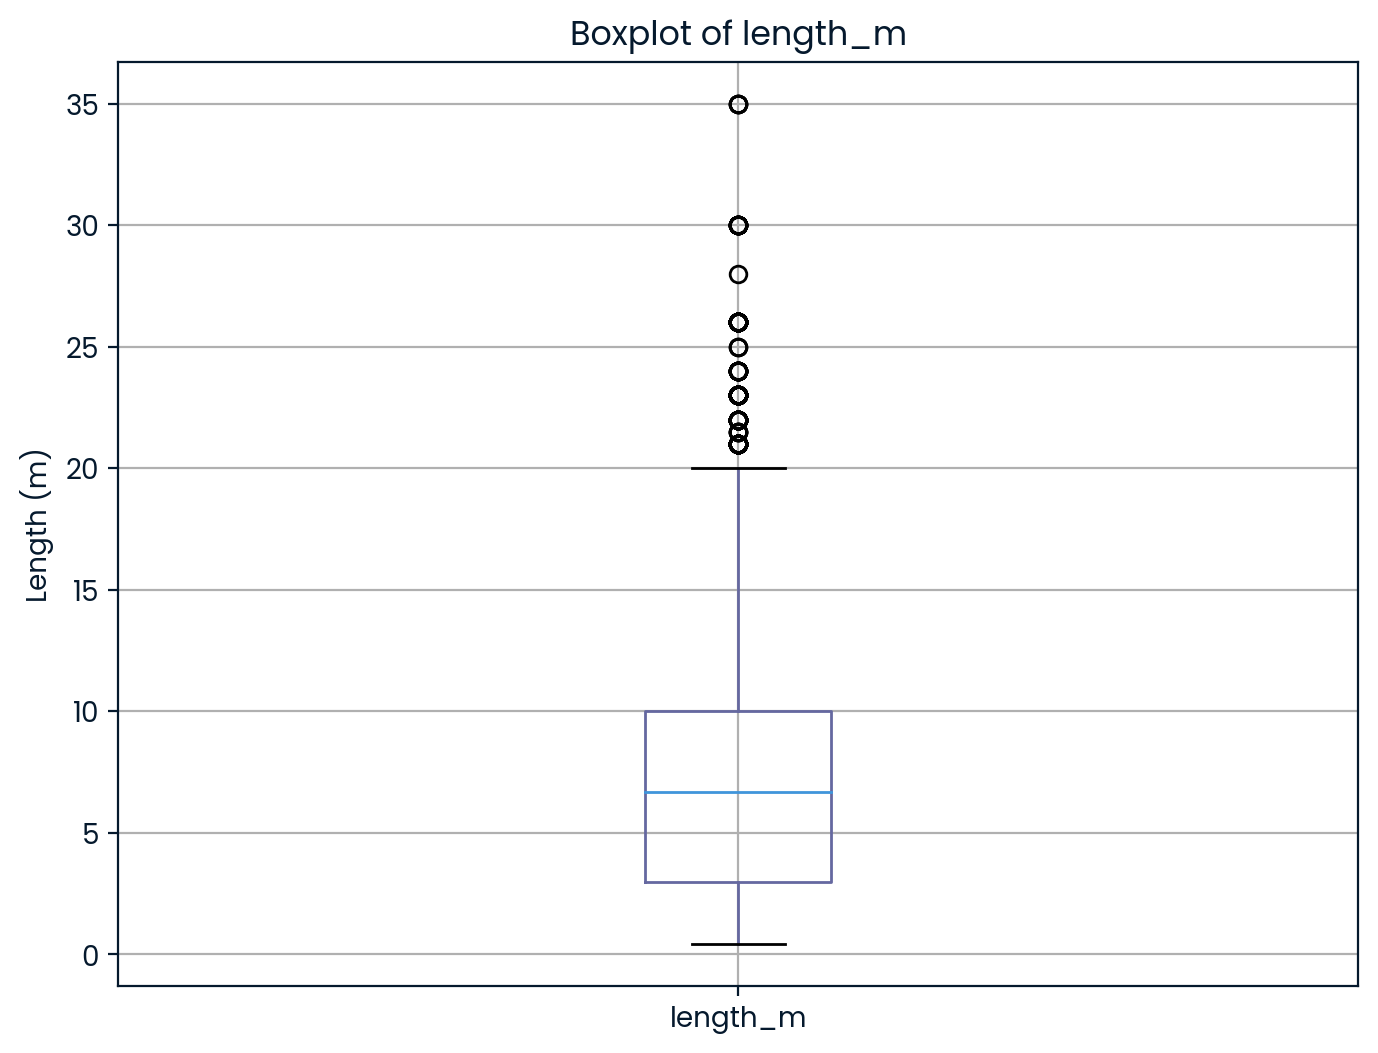

In [9]:
plt.figure(figsize=(8, 6))
df.boxplot(column='length_m')
plt.title('Boxplot of length_m')
plt.ylabel('Length (m)')
plt.show()

In [10]:
df['length_m'].median()

6.699999999999999

In [11]:
df['length_m'].fillna(df['length_m'].median(),inplace = True)

In [13]:
df.head()

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae


In [14]:
# Count the number of unique dinosaur names
num_unique_names = df['name'].nunique()
print("Number of different dinosaur names:", num_unique_names)


Number of different dinosaur names: 1042


In [15]:
# Find the largest dinosaur based on the 'length_m' column
largest_dinosaur = df[df['length_m'] == df['length_m'].max()]
print("The largest dinosaur:", largest_dinosaur['name'].iloc[0])

The largest dinosaur: Supersaurus


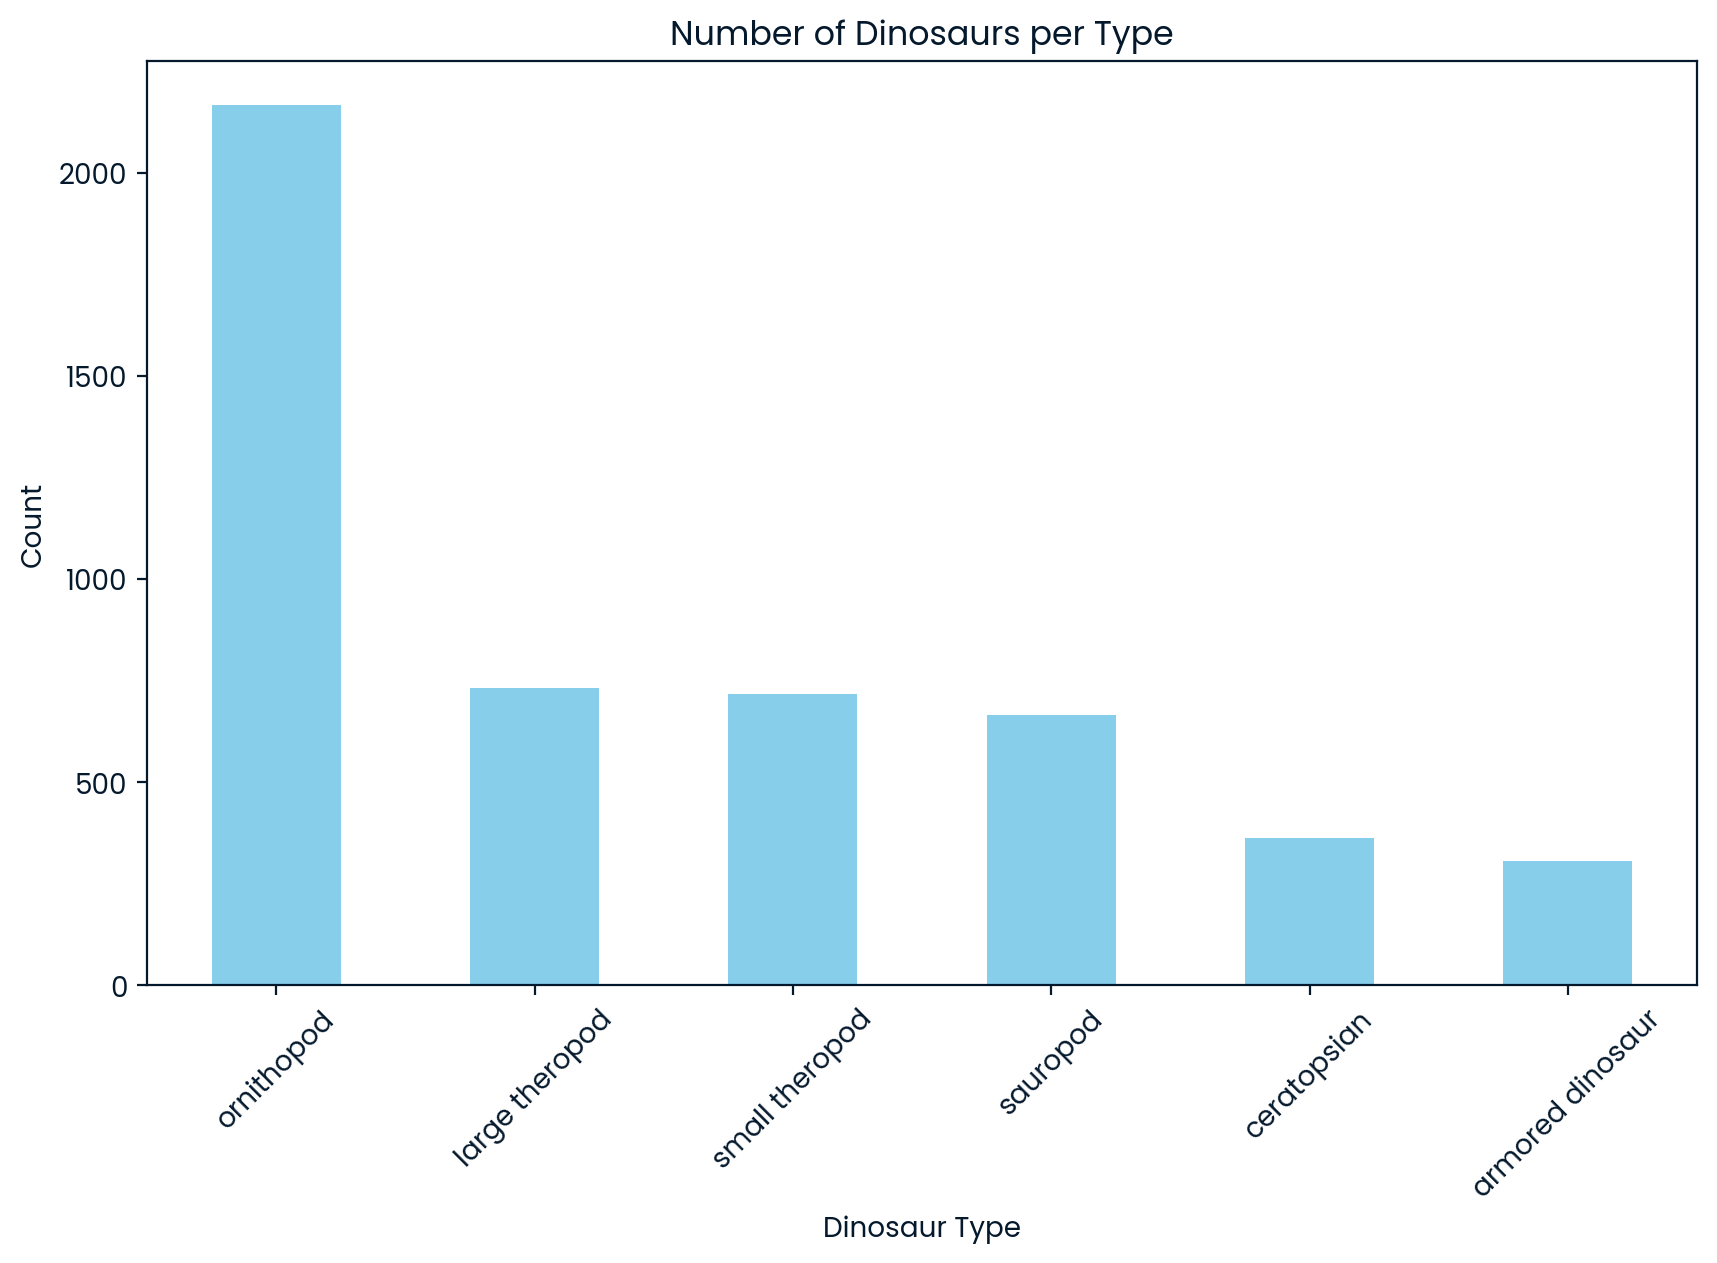

In [16]:

# 4. Number of dinosaurs per type (with visualization)
dinosaur_type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
dinosaur_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Dinosaurs per Type')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

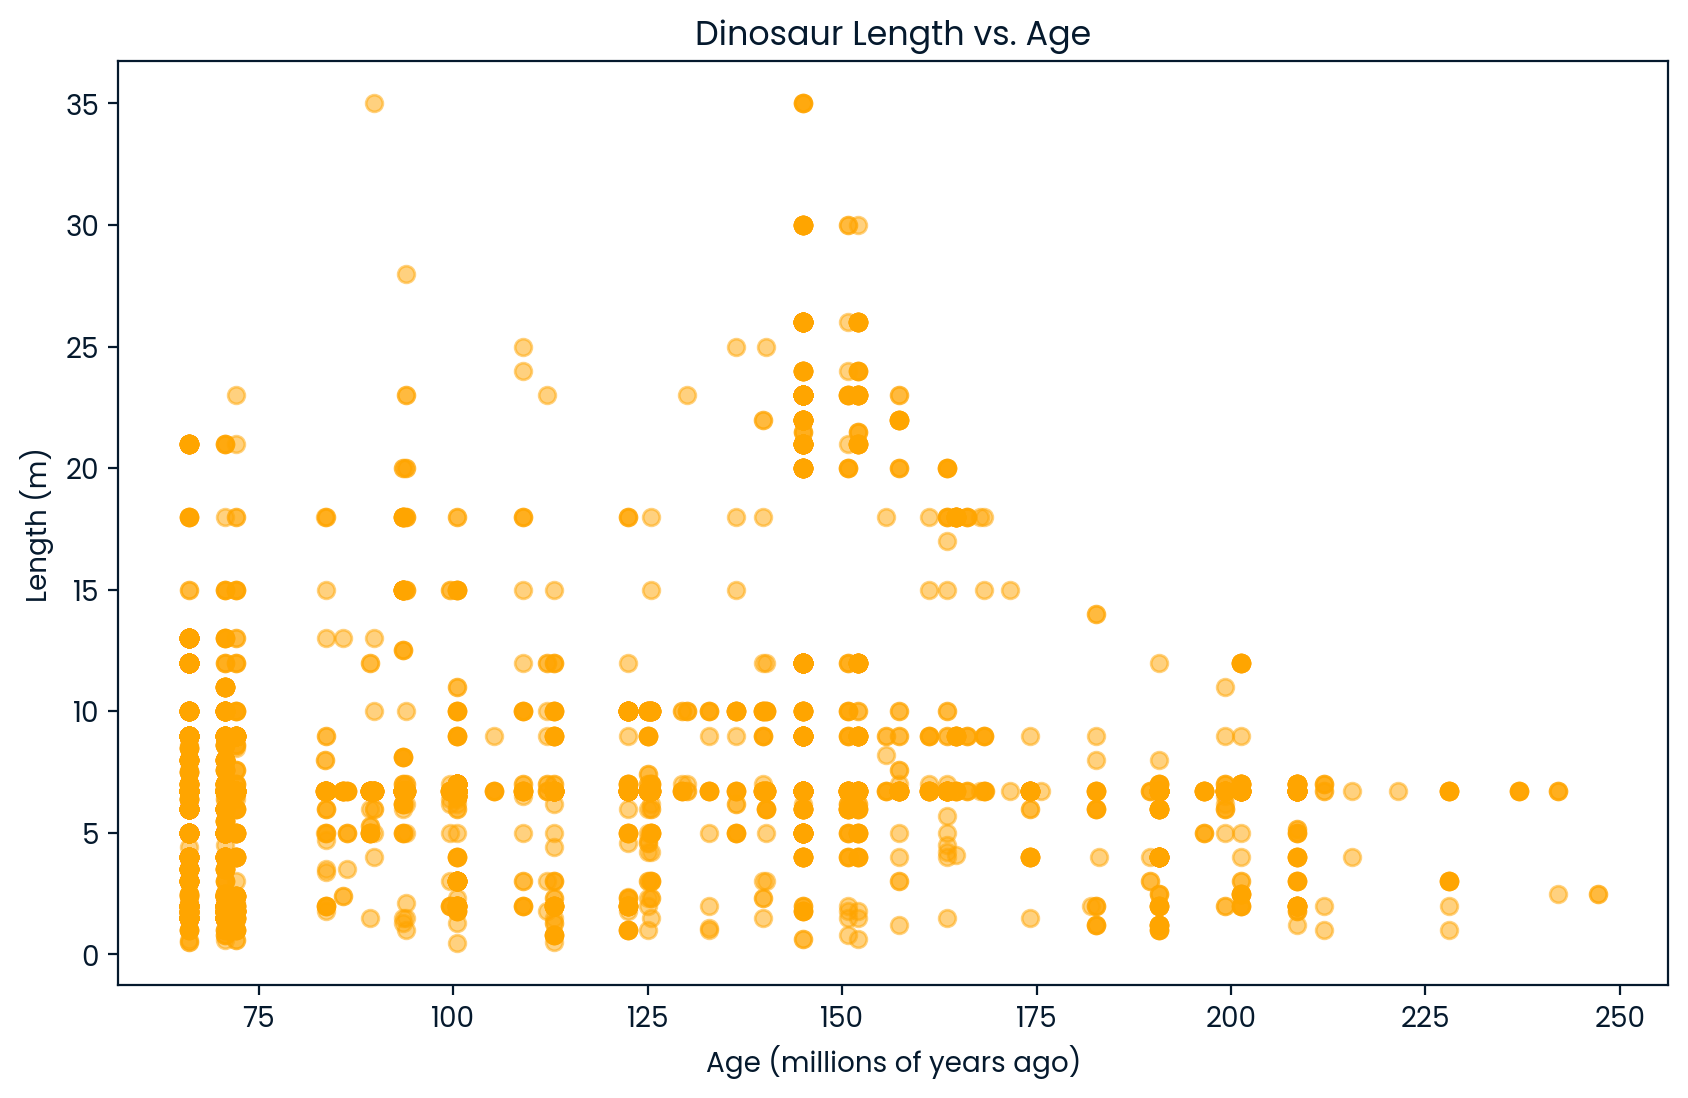

In [18]:
#Dinosaur Length vs. Age (with visualization)
plt.figure(figsize=(10, 6))
plt.scatter(df['min_ma'], df['length_m'], alpha=0.5, color='orange')
plt.title('Dinosaur Length vs. Age')
plt.xlabel('Age (millions of years ago)')
plt.ylabel('Length (m)')
plt.show()


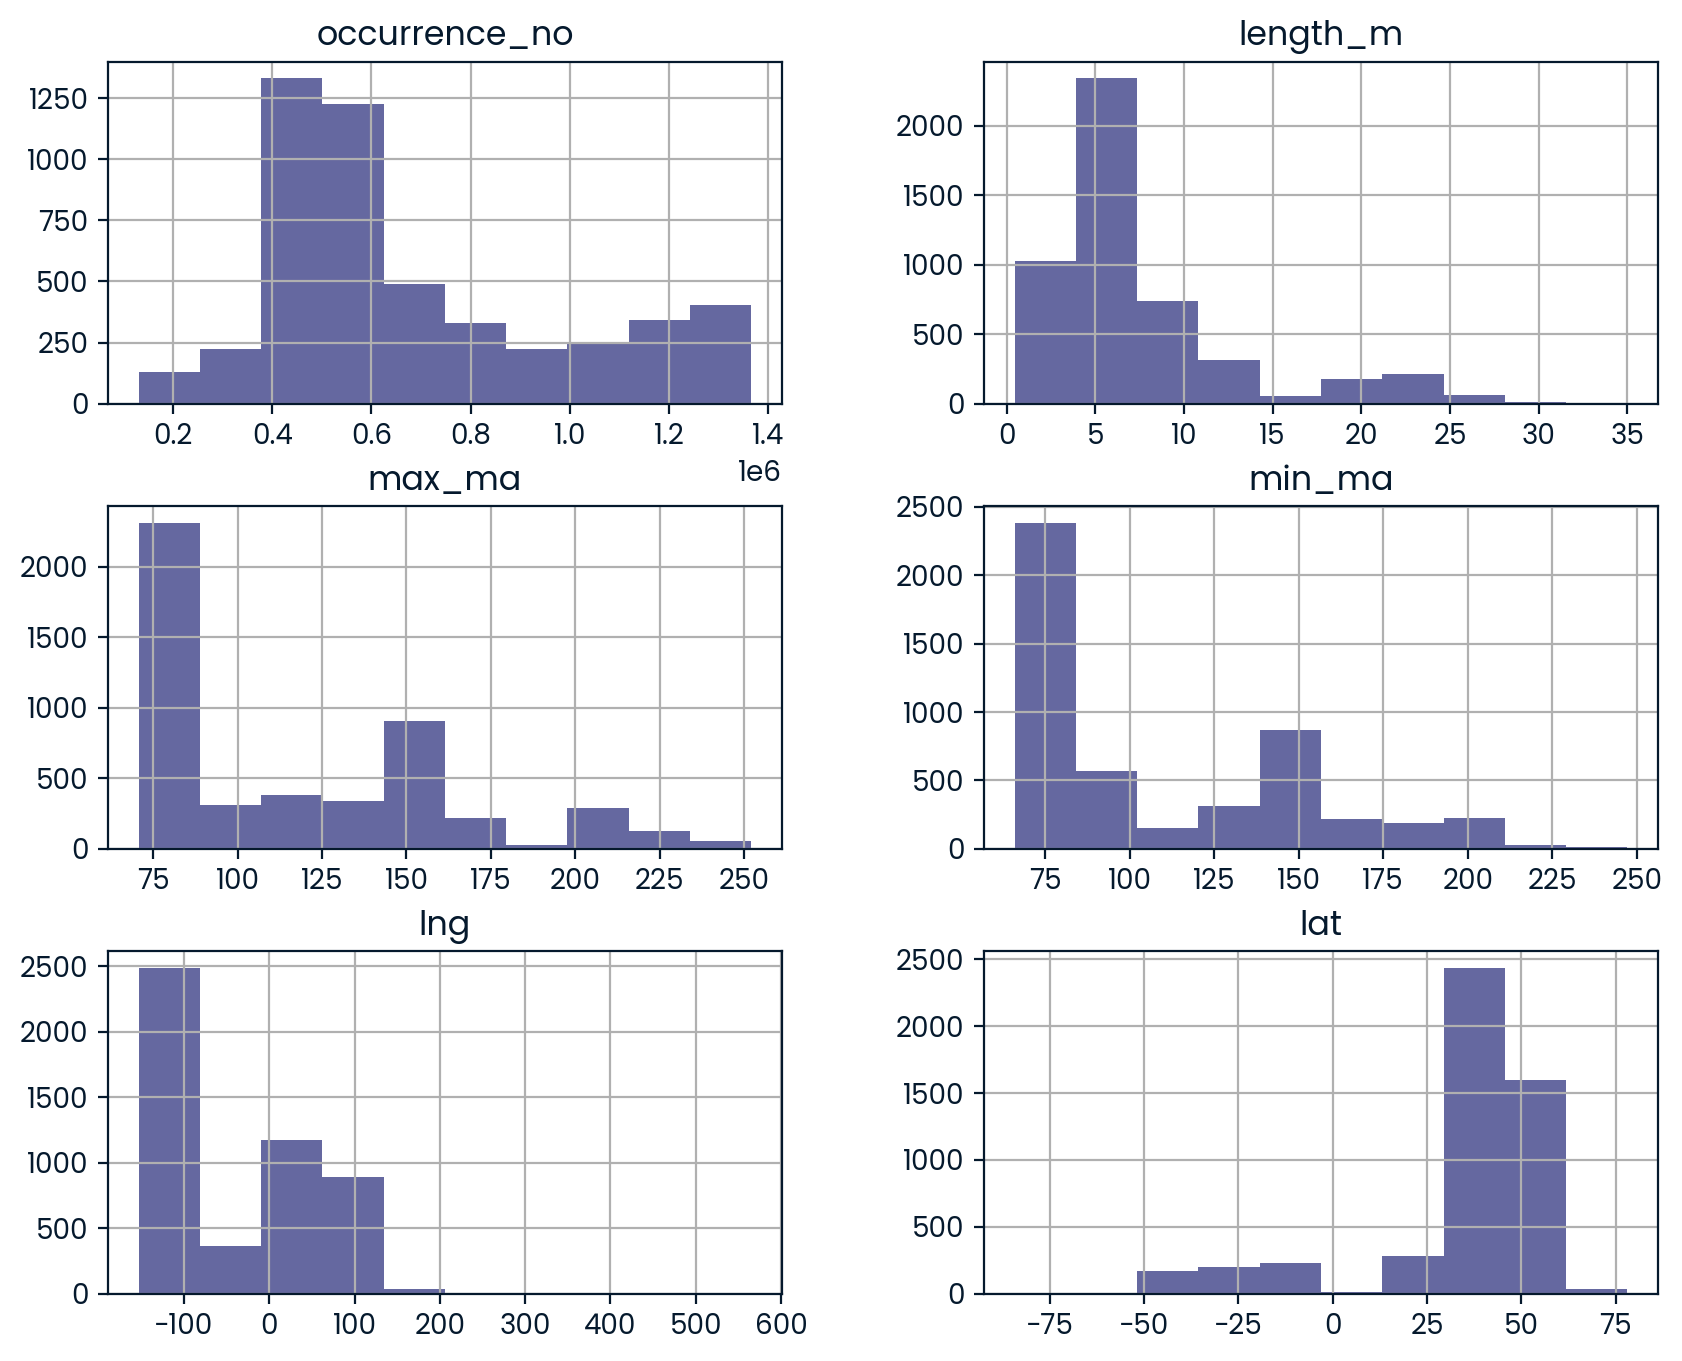

In [20]:
# Plot histograms for numerical columns
df.hist(figsize=(10, 8))
plt.show()


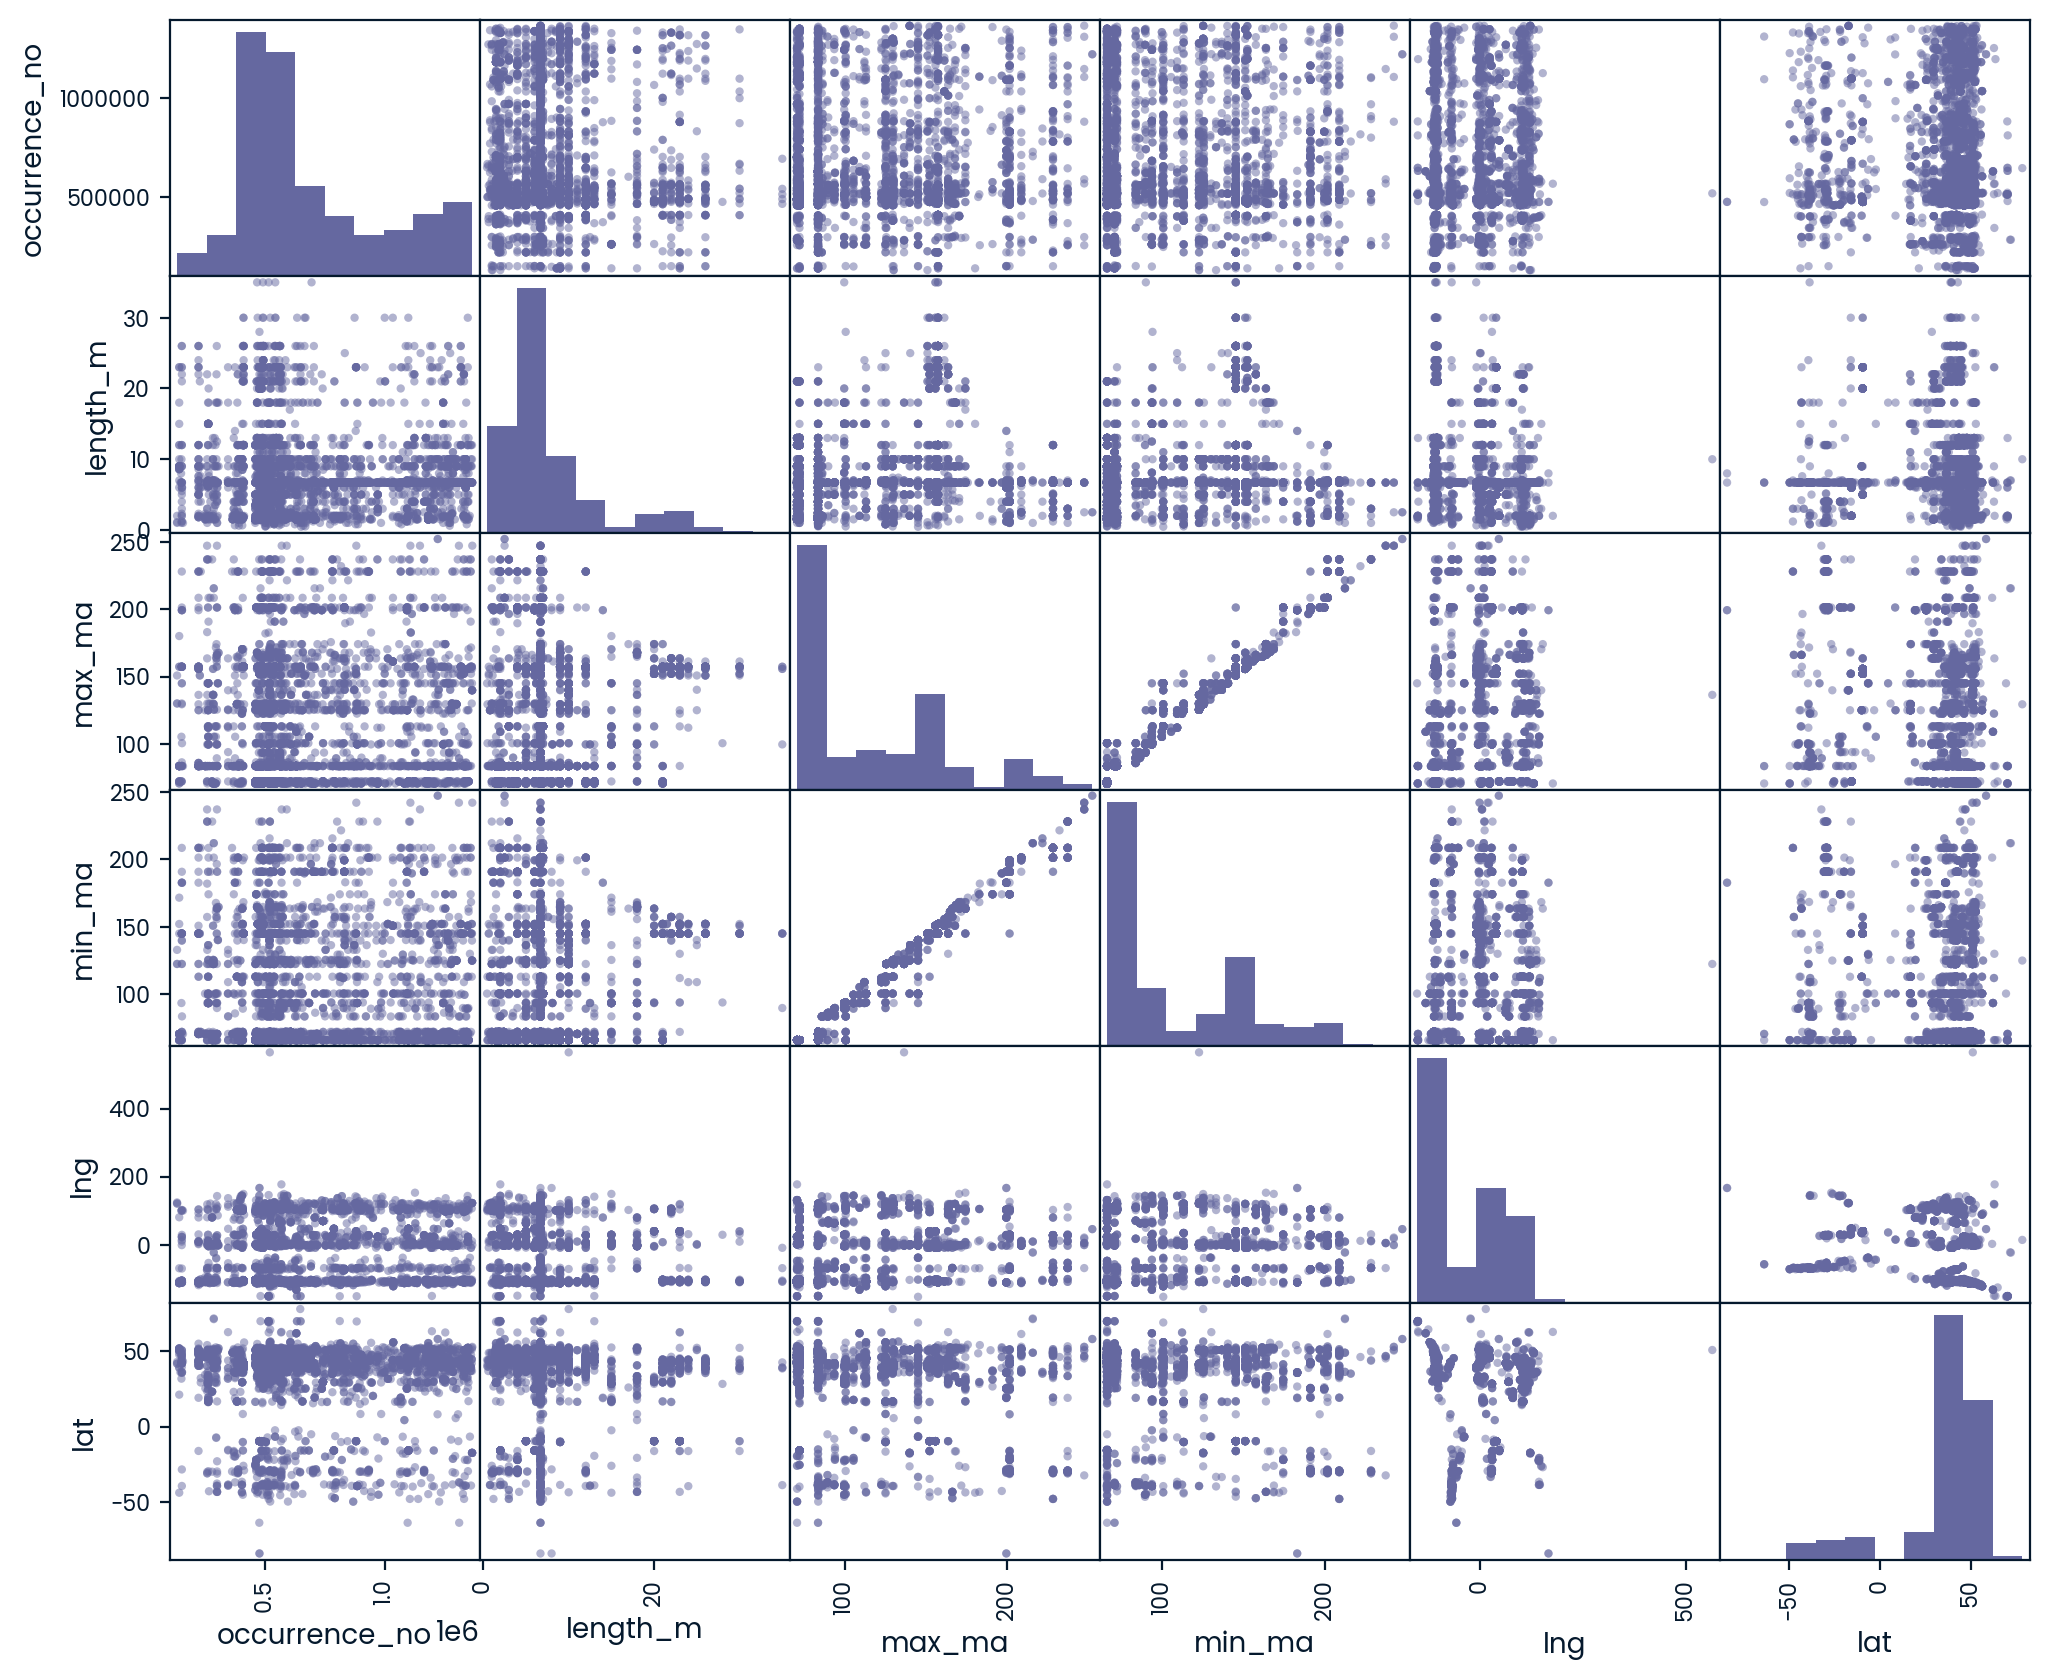

In [21]:
# Plot scatter plots for pairs of numerical columns
pd.plotting.scatter_matrix(df, figsize=(12, 10))
plt.show()

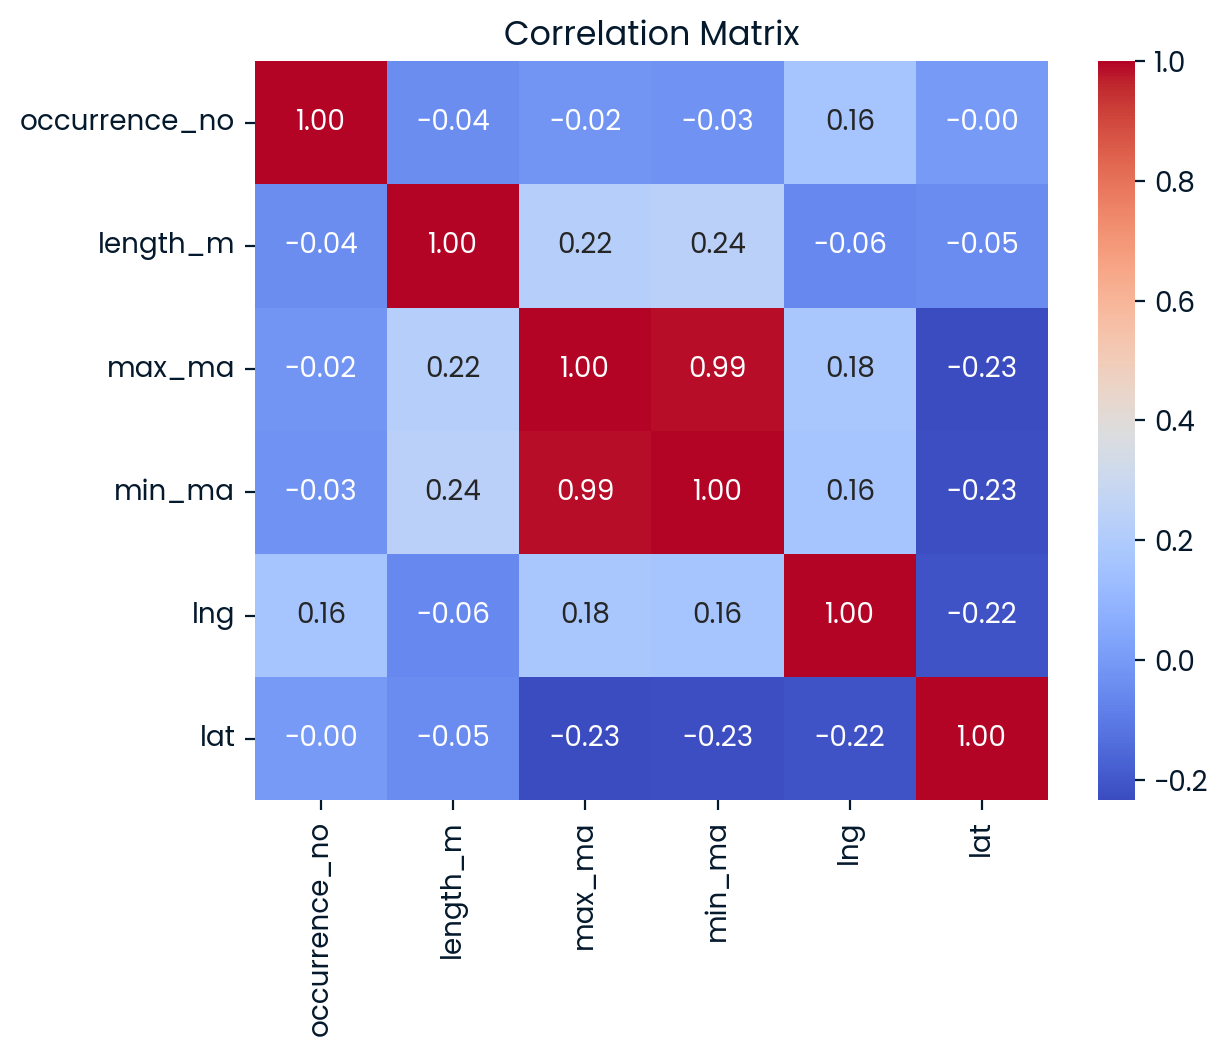

In [23]:
# Calculate the correlation matrix for numeric columns only
import seaborn as sns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
